# PE06 Hrishikesh Vaze
## DWDM Lab 1 Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns

In [7]:
#short hand for dataframe
marks = [[90,91,97], [92,81,96], [89,91,88], [81,71,67] , [94,95,99]]
df = pd.DataFrame(
    marks, 
    columns = ['Maths', 'Science', 'Hindi'], 
    index = ['Arnab', 'Ramit','Samridhi','Riya','Mallika'])
print(df)

# filter a column
print(df.filter(['Maths', 'Science']))

# filter marks : maths > 90
print(df[ df['Maths'] > 90])

# desceding order
print(df.sort_values(by = 'Science', ascending = False))

# mean of marks subject wise
print(df.mean())

          Maths  Science  Hindi
Arnab        90       91     97
Ramit        92       81     96
Samridhi     89       91     88
Riya         81       71     67
Mallika      94       95     99
          Maths  Science
Arnab        90       91
Ramit        92       81
Samridhi     89       91
Riya         81       71
Mallika      94       95
         Maths  Science  Hindi
Ramit       92       81     96
Mallika     94       95     99
          Maths  Science  Hindi
Mallika      94       95     99
Arnab        90       91     97
Samridhi     89       91     88
Ramit        92       81     96
Riya         81       71     67
Maths      89.2
Science    85.8
Hindi      89.4
dtype: float64


In [2]:
# loading all datasets
df1 = pd.read_csv('../datasets/powerconsumption_india/data.csv')

In [5]:
df1.describe # printing the summary of the dataset

<bound method NDFrame.describe of           States Regions   latitude  longitude                Dates  Usage
0         Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
1        Haryana      NR  28.450006  77.019991  02/01/2019 00:00:00  130.3
2      Rajasthan      NR  26.449999  74.639981  02/01/2019 00:00:00  234.1
3          Delhi      NR  28.669993  77.230004  02/01/2019 00:00:00   85.8
4             UP      NR  27.599981  78.050006  02/01/2019 00:00:00  313.9
...          ...     ...        ...        ...                  ...    ...
16594    Manipur     NER  24.799971  93.950017  05/12/2020 00:00:00    2.5
16595  Meghalaya     NER  25.570492  91.880014  05/12/2020 00:00:00    5.8
16596    Mizoram     NER  23.710399  92.720015  05/12/2020 00:00:00    1.6
16597   Nagaland     NER  25.666998  94.116570  05/12/2020 00:00:00    2.1
16598    Tripura     NER  23.835404  91.279999  05/12/2020 00:00:00    3.3

[16599 rows x 6 columns]>

In [6]:
df1.shape # printing the shape of the dataset

(16599, 6)

In [8]:
df1.head(3) # printing the first 3 rows of the dataset

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1


In [10]:
print(f'size: {df1.size}') # printing the size of the dataset
print(f'ndim: {df1.ndim}') # printing the dimension of the dataset

size: 99594
ndim: 2


In [11]:
df1.info() # printing the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [12]:
df1.iloc[0:5,0:2]

,States,Regions
0,Punjab,NR
1,Haryana,NR
2,Rajasthan,NR
3,Delhi,NR
4,UP,NR


In [16]:
print(f'Min: {df1["Usage"].mean()}')
print(f'Max: {df1["Usage"].max()}')
print(f'Mean: {df1["Usage"].mean()}')
print(f'Median: {df1["Usage"].median()}')
print(f'Std: {df1["Usage"].std()}')

Min: 103.00186155792517
Max: 522.1
Mean: 103.00186155792517
Median: 64.4
Std: 116.04405564998866


In [17]:
df1.isnull().sum() # printing the number of null values in the dataset

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [18]:
# put missing values with mean if any
df1['Usage'].fillna(df1['Usage'].mean(), inplace = True)

In [19]:
#all categorical cols
print([i for i in df1.columns if df1[i].dtype == 'object'])

['States', 'Regions', 'Dates']


# SKLEARN

## Label Encoder

In [24]:
df1['Regions'].value_counts()

NR     4527
NER    3521
WR     3018
SR     3018
ER     2515
Name: Regions, dtype: int64

In [27]:
# encode Regions
label_encoder = LabelEncoder()
df1['Encoded_Regions'] = label_encoder.fit_transform(df1['Regions'])
df1['Encoded_Regions'].value_counts()


2    4527
1    3521
4    3018
3    3018
0    2515
Name: Encoded_Regions, dtype: int64

## Tuple Duplpication

In [30]:
df1.duplicated(subset=None, keep=False).value_counts()

False    16575
True        24
dtype: int64

In [32]:
df1 = df1[ ~ df1.duplicated(subset=None, keep=False)]
df1.shape

(16575, 7)

## Data Transformation - Normalisation

In [33]:
scaler = MinMaxScaler()
df1['Usage'].head(10)

0    119.9
1    130.3
2    234.1
3     85.8
4    313.9
5     40.7
6     30.0
7     52.5
8      5.0
9     78.7
Name: Usage, dtype: float64

In [35]:
scaler.fit_transform(df1[['Usage']])

array([[0.22920659],
       [0.2491376 ],
       [0.44806439],
       ...,
       [0.00249138],
       [0.0034496 ],
       [0.00574933]])

## Standard Scaler

In [36]:
scaler = StandardScaler()
scaler.fit_transform(df1[['Usage']])

array([[ 0.14437394],
       [ 0.23397933],
       [ 1.12831002],
       ...,
       [-0.87488734],
       [-0.87057939],
       [-0.86024031]])

# Corelation Matrix

## Heatmap


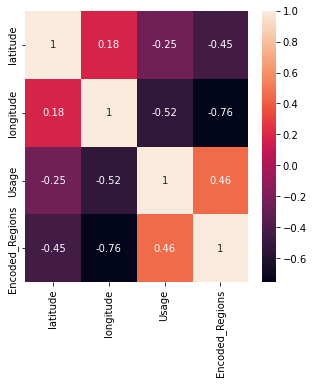

In [39]:
#using sns library
correlation_matrix = df1.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, vmax = 1, annot=True)
plt.show()

## Histogram

In [41]:
df1.head(5)

,States,Regions,latitude,longitude,Dates,Usage,Encoded_Regions
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,2
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3,2
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1,2
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8,2
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9,2


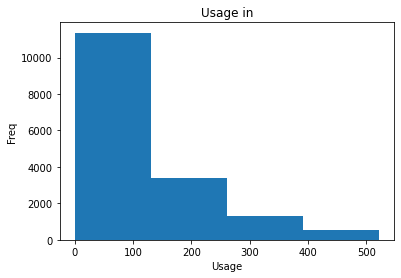

In [44]:
# plotting usage in histogram
fig, hist = plt.subplots()
hist.hist(df1['Usage'], bins = 4, label = 'Usage')
hist.set_xlabel('Usage')
hist.set_ylabel('Freq')
hist.set_title('Usage in')
plt.show()